# Data Science com Python

## Parte 03: Histograma e gráfico de frequência

Histogramas e gráficos de frequência são utilizados para analisar a distribuição de frequência de um determinado conjunto de dados. Na sua versão para dados contínuos, o histograma representa a frequência com a qual os valores presentes no conjunto estudado aparecem em intervalos de tamanho igual pré-calculados. Para entender o uso desse tipo de gráfico, trabalharemos com uma nova base denominada housing_ok.csv, contendo dados imobiliários da cidade de Melbourne, Austrália.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Estudos /Machine Learning/housing_ok.csv')
df.head()

,bairro,endereco,quartos,tipo,preco,distancia_aeroporto,cep,banheiros,vagas,area_terreno,area_construida,ano_construcao,latitude,longitude
0,Collingwood,2/79 Oxford St,2,kitnet,855000.0,1.6,3066.0,1,1,2886.0,122.0,1830.0,-37.8042,144.9845
1,Fitzroy,52 Nicholson St,4,casa,3310000.0,1.6,3065.0,4,2,337.0,291.0,1854.0,-37.8052,144.9739
2,Parkville,152 Park Dr,2,casa,2200000.0,2.6,3052.0,2,1,190.0,172.0,1875.0,-37.7928,144.9575
3,Carlton,100 Faraday St,2,casa,1010000.0,1.8,3053.0,1,0,101.0,60.0,1880.0,-37.7989,144.9713
4,Fitzroy North,470 Brunswick St,2,casa,860000.0,3.5,3068.0,1,0,104.0,70.0,1880.0,-37.7927,144.9796


Iniciamos a análise execcutando o comando DataFrame.info() para investigar o conteúdo da tabela.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bairro               2832 non-null   object 
 1   endereco             2832 non-null   object 
 2   quartos              2832 non-null   int64  
 3   tipo                 2832 non-null   object 
 4   preco                2832 non-null   float64
 5   distancia_aeroporto  2832 non-null   float64
 6   cep                  2832 non-null   float64
 7   banheiros            2832 non-null   int64  
 8   vagas                2832 non-null   int64  
 9   area_terreno         2832 non-null   float64
 10  area_construida      2832 non-null   float64
 11  ano_construcao       2832 non-null   float64
 12  latitude             2832 non-null   float64
 13  longitude            2832 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 309.9+ KB



Temos um total de 14 colunas, sendo 11 do tipo numérico real (float64) e 3 do tipo texto (object). Investigaremos as colunas quartos, banheiros e vagas para verificar se existe necessidade de manter o tipo float64.

Obs: Esse passo é opcional. A transformação de tipos de dados melhora a eficiência do uso de memória por parte do DataFrame. O tipo float64 ocupa mais espaço do que o tipo int64, por exemplo.

Utilizaremos o comando Series.unique() para verificar a diversidade de valores contidos nas três colunas.

In [4]:
df.quartos.unique()

array([2, 4, 3, 5, 6, 1, 8, 7])

In [5]:
df.banheiros.unique()

array([1, 4, 2, 5, 3, 6, 8, 7])

In [6]:
df.vagas.unique()

array([1, 2, 0, 3, 4, 6, 5, 7, 8])

É possível perceber que não existe, de fato, a necessidade de manter o tipo das três colunas como float64. O formato int8 consegue guardar valores no intervalo de -128 até 127.

Sabemos que seria pouco provável a existência de um imóvel com mais de 127 quartos, banheiros ou vagas. Sendo assim, faz sentido utilizarmos esse formato. Para modificar o tipo de uma coluna, utilizamos o comando Series.astype('int8'), atribuindo o resultado à própria coluna.

In [8]:
df.quartos = df.quartos.astype('int8')
df.banheiros = df.banheiros.astype('int8')
df.vagas = df.vagas.astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bairro               2832 non-null   object 
 1   endereco             2832 non-null   object 
 2   quartos              2832 non-null   int8   
 3   tipo                 2832 non-null   object 
 4   preco                2832 non-null   float64
 5   distancia_aeroporto  2832 non-null   float64
 6   cep                  2832 non-null   float64
 7   banheiros            2832 non-null   int8   
 8   vagas                2832 non-null   int8   
 9   area_terreno         2832 non-null   float64
 10  area_construida      2832 non-null   float64
 11  ano_construcao       2832 non-null   float64
 12  latitude             2832 non-null   float64
 13  longitude            2832 non-null   float64
dtypes: float64(8), int8(3), object(3)
memory usage: 251.8+ KB


Observer que o uso de memória do DataFrame caiu de 309.9+ KB para 251.8+ KB


# Gráfico de frequência categórica

Para nosso primeiro gráfico de frequência, plotaremos o resultado associado ao número de quartos. Como visto anteriormente, o número de quartos representa um conjunto limitado de opções. Para contar a frequência de ocorrência dos valores de uma coluna, utilizamos o comando Series.value_counts().

In [9]:
df.quartos.value_counts()

,count
quartos,
3,1287
4,687
2,631
5,158
1,50
6,14
7,3
8,2


O resultado obtido é representado na forma de um DataFrame de coluna única (denominado Series), com o número de quartos como indice e as frequências correspondentes como os valores. Utilizando o comando Series.plot.bar(), temos a possibilidade de criar gráficos de barras diretamente a partir de uma Series.

<Axes: xlabel='quartos'>

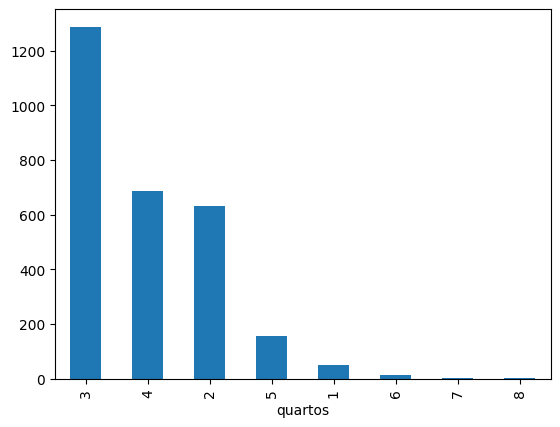

In [14]:
df.quartos.value_counts().plot.bar()


Através do gráfico de frequência gerado é possível concluir que a maioria dos imóveis da tabela possui entre 2 e 4 quartos, sendo 3 o valor com maior frequência.

<Axes: ylabel='Frequency'>

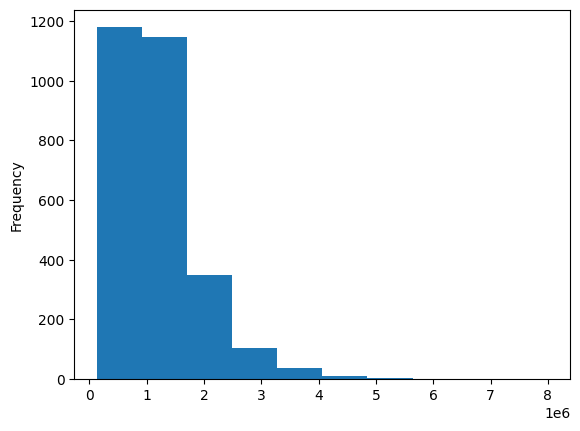

In [15]:
df.preco.plot.hist()



## Dividindo por 1000

Nesse caso, precisamos dividir a Series contendo os preços dos imóveis por 1000, resultando em uma nova Series. Com os parênteses, utilizamos a função Series.plot.hist() ou simplesmente Series.hist().

<Axes: >

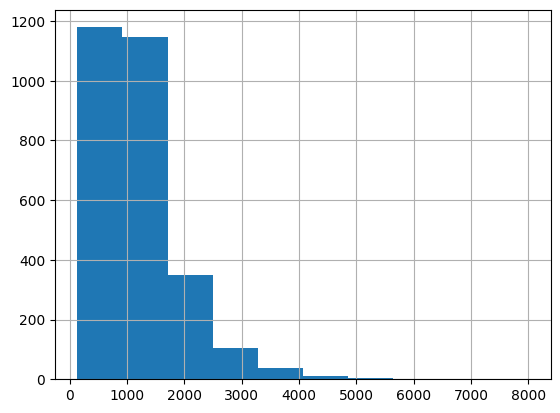

In [18]:
(df.preco / 1000).hist()

## Rotacionando os valores do eixo

Para aplicar a rotação dos valores do eixo
, precisamos utilizar o comando Series.plot.hist() (o parâmetro rot não está presente na função direta Series.hist())



<Axes: ylabel='Frequency'>

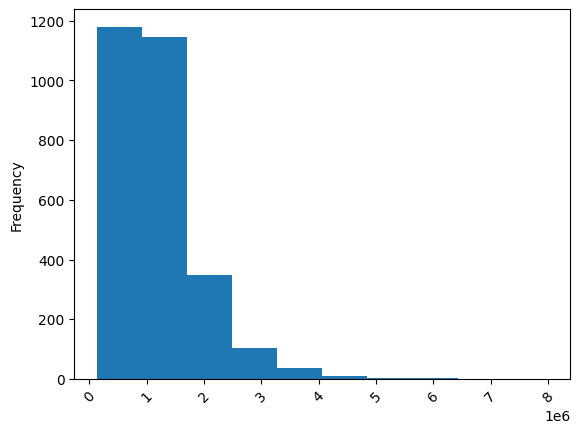

In [19]:
#Rotação de 45° graus
df.preco.plot.hist(rot=45)


## Filtrando possíveis outliers
Analisando o histograma acima, observamos que a maioria dos preços é inferior a 3 milhões.

Para melhorar a visualização, podemos eliminar os preços que aparecem com menor frequência. Analisando o histograma, parece sensato eliminarmos valores superiores a 5 milhões.

<Axes: ylabel='Frequency'>

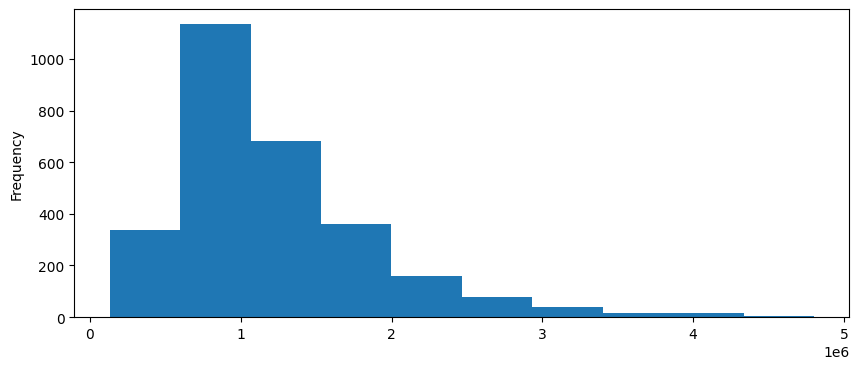

In [21]:
filtro = (df.preco <=5e6)
df[filtro].preco.plot.hist(figsize=(10,4))


Qualquer valor fora dela como sendo um outlier. Para calcular a média e o desvio padrão dos valores de uma coluna utilizamos, respectivamente, as funções Series.mean() e Series.std(). Para calcular o limite superior, faremos μ + 3 × σ.



In [24]:
df.preco.mean() + 3 * df.preco.std()

3340065.670736038

De maneira análoga, para calcular o limite inferior, faremos

In [26]:
df.preco.mean() - 3 * df.preco.std()

-902211.1643801061

Para aplicar o filtro no preço dos imóveis para esse intervalo, utilizaremos o comando Series.between(), que recebe como parâmetros os limites superior e inferior. Por questão de organização, criaremos uma variável chamada superior para guardar o limite superior e uma variável chamada inferior para aguardar o limite inferior. Em seguida, criaremos uma variável chamada filtro para guardar o filtro resultante da função Series.between(). Finalmente, aplicaremos o filtro do DataFrame e criaremos o histograma.

<Axes: ylabel='Frequency'>

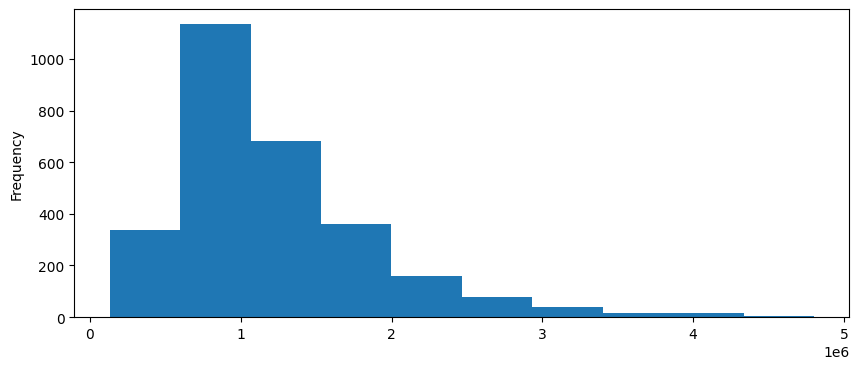

In [27]:
superior = df.preco.mean() + 3 * df.preco.std()
inferior = df.preco.mean() - 3 * df.preco.std()
df[filtro].preco.plot.hist(figsize = (10,4))

Com o novo histograma é possível identificar que boa parte dos imóveis possuem valores de quinhentos mil a um milhão e quinhetos mil dólares. Entretanto, para melhor analisar a distribuição de preços dos imóveis, precisamos considerar os tipos disponíveis. Utilizando o comando Series.unique(), verificaremos os tipos de imóveis.

In [28]:
df.tipo.unique()

array(['kitnet', 'casa', 'apartamento'], dtype=object)

Temos três tipos de imóveis (kitnet, casa e apartamento). Para cada tipo, criaremos o histograma de preços para comparar as distribuições de frequência. Para tanto, definiremos o parâmetro by como sendo igual a coluna tipo. Esse parâmetro só terá efeito na função direta Series.hist().

Para melhorar a visualização, definiremos o parâmetro figsize=(15, 8).

array([[<Axes: title={'center': 'apartamento'}>,
        <Axes: title={'center': 'casa'}>],
       [<Axes: title={'center': 'kitnet'}>, <Axes: >]], dtype=object)

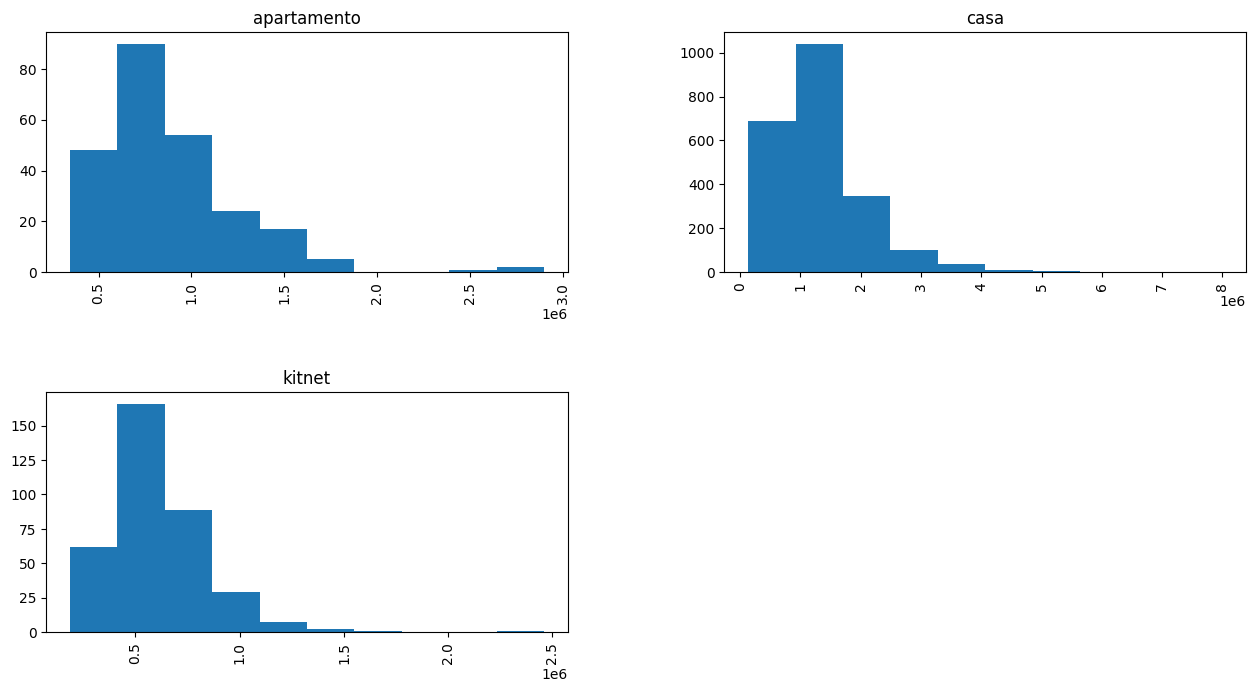

In [29]:
df.preco.hist(figsize=(15,8), by=df.tipo)